In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/mail_data.csv")

In [ ]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
data=df.where((pd.notnull(df)),'')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


(5572, 2)

In [8]:
data.loc[data['Category']=='spam','Category',]=0
data.loc[data['Category']=='ham','Category',]=1

In [10]:
X=data['Message']
Y=data['Category']
print("X represents")
print (X)
print("Y represents")
print (Y)

X represents
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
Y represents
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [13]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [14]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [25]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [17]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [18]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [19]:
model=LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

In [20]:
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [21]:
print("Accuracy on training data :",accuracy_on_training_data)

Accuracy on training data : 0.9676912721561588


In [23]:
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [24]:
print("Accuracy on test data :",accuracy_on_test_data)

Accuracy on test data : 0.9668161434977578


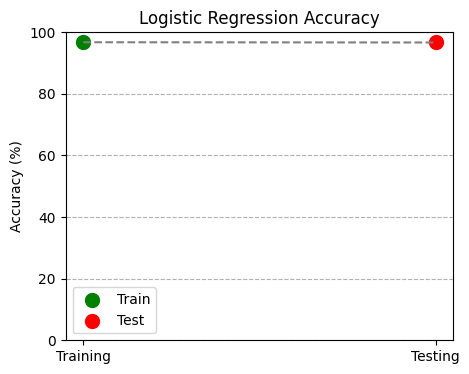

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train model
lr_model = LogisticRegression()
lr_model.fit(X_train_features, Y_train)

# Predict
train_pred_lr = lr_model.predict(X_train_features)
test_pred_lr = lr_model.predict(X_test_features)

# Accuracy
train_acc_lr = accuracy_score(Y_train, train_pred_lr) * 100
test_acc_lr = accuracy_score(Y_test, test_pred_lr) * 100

# Scatter Plot
plt.figure(figsize=(5, 4))
plt.scatter([0], [train_acc_lr], color='green', label='Train', s=100)
plt.scatter([1], [test_acc_lr], color='red', label='Test', s=100)
plt.plot([0, 1], [train_acc_lr, test_acc_lr], '--', color='gray')
plt.xticks([0, 1], ['Training', 'Testing'])
plt.ylabel('Accuracy (%)')
plt.title('Logistic Regression Accuracy')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()


In [44]:
print("Acccuracy on training data",train_acc_lr)
print("Acccuracy on testing data",test_acc_lr)

Acccuracy on training data 96.76912721561588
Acccuracy on testing data 96.68161434977578


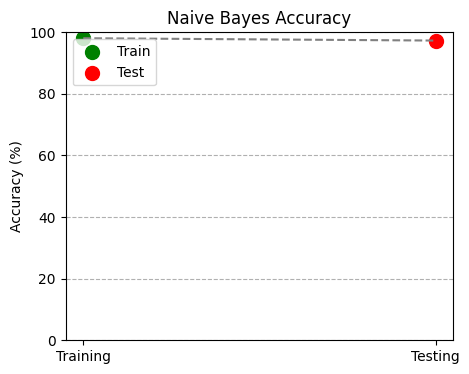

In [31]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_features, Y_train)

train_pred_nb = nb_model.predict(X_train_features)
test_pred_nb = nb_model.predict(X_test_features)

train_acc_nb = accuracy_score(Y_train, train_pred_nb) * 100
test_acc_nb = accuracy_score(Y_test, test_pred_nb) * 100

plt.figure(figsize=(5, 4))
plt.scatter([0], [train_acc_nb], color='green', label='Train', s=100)
plt.scatter([1], [test_acc_nb], color='red', label='Test', s=100)
plt.plot([0, 1], [train_acc_nb, test_acc_nb], '--', color='gray')
plt.xticks([0, 1], ['Training', 'Testing'])
plt.ylabel('Accuracy (%)')
plt.title('Naive Bayes Accuracy')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()


In [45]:
print("Accuracy on training data on Naive Bayes",train_acc_nb)
print("Accuracy on testing data on Naive Bayes",test_acc_nb)

Accuracy on training data on Naive Bayes 98.07045097599281
Accuracy on testing data on Naive Bayes 97.30941704035875


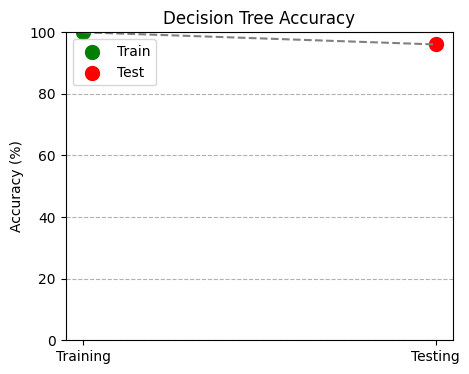

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_features, Y_train)

train_pred_dt = dt_model.predict(X_train_features)
test_pred_dt = dt_model.predict(X_test_features)

train_acc_dt = accuracy_score(Y_train, train_pred_dt) * 100
test_acc_dt = accuracy_score(Y_test, test_pred_dt) * 100

plt.figure(figsize=(5, 4))
plt.scatter([0], [train_acc_dt], color='green', label='Train', s=100)
plt.scatter([1], [test_acc_dt], color='red', label='Test', s=100)
plt.plot([0, 1], [train_acc_dt, test_acc_dt], '--', color='gray')
plt.xticks([0, 1], ['Training', 'Testing'])
plt.ylabel('Accuracy (%)')
plt.title('Decision Tree Accuracy')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()


In [46]:
print("Accuracy on training data in decision tree",train_acc_dt)
print("Accuracy on testing data in decision tree",test_acc_dt)

Accuracy on training data in decision tree 100.0
Accuracy on testing data in decision tree 96.05381165919282


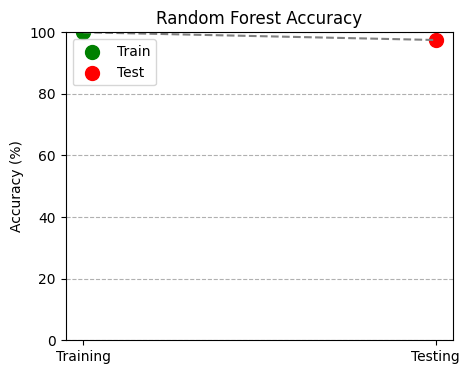

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_features, Y_train)

train_pred_rf = rf_model.predict(X_train_features)
test_pred_rf = rf_model.predict(X_test_features)

train_acc_rf = accuracy_score(Y_train, train_pred_rf) * 100
test_acc_rf = accuracy_score(Y_test, test_pred_rf) * 100

plt.figure(figsize=(5, 4))
plt.scatter([0], [train_acc_rf], color='green', label='Train', s=100)
plt.scatter([1], [test_acc_rf], color='red', label='Test', s=100)
plt.plot([0, 1], [train_acc_rf, test_acc_rf], '--', color='gray')
plt.xticks([0, 1], ['Training', 'Testing'])
plt.ylabel('Accuracy (%)')
plt.title('Random Forest Accuracy')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()


In [47]:
print("Accuracy on training data in random forest",train_acc_rf)
print("Accuracy on testing data in random forest",test_acc_rf)

Accuracy on training data in random forest 100.0
Accuracy on testing data in random forest 97.48878923766816


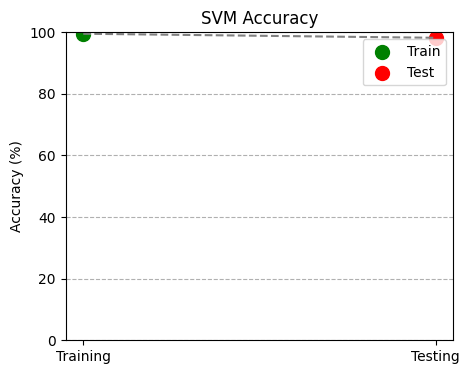

In [34]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_features, Y_train)

train_pred_svm = svm_model.predict(X_train_features)
test_pred_svm = svm_model.predict(X_test_features)

train_acc_svm = accuracy_score(Y_train, train_pred_svm) * 100
test_acc_svm = accuracy_score(Y_test, test_pred_svm) * 100

plt.figure(figsize=(5, 4))
plt.scatter([0], [train_acc_svm], color='green', label='Train', s=100)
plt.scatter([1], [test_acc_svm], color='red', label='Test', s=100)
plt.plot([0, 1], [train_acc_svm, test_acc_svm], '--', color='gray')
plt.xticks([0, 1], ['Training', 'Testing'])
plt.ylabel('Accuracy (%)')
plt.title('SVM Accuracy')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()


In [48]:
print("Accuracy on training data in SVM",train_acc_svm)
print("Accuracy on testing data in SVM",test_acc_svm)

Accuracy on training data in SVM 99.52883105227731
Accuracy on testing data in SVM 98.20627802690582


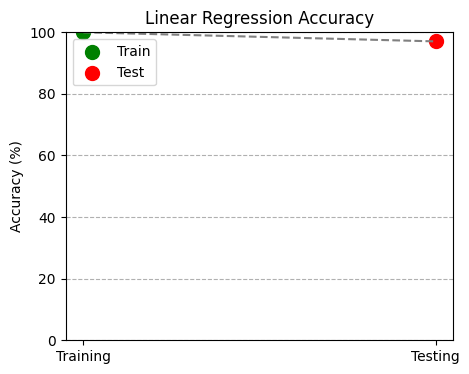

In [35]:
from sklearn.linear_model import LinearRegression
import numpy as np

lr2_model = LinearRegression()
lr2_model.fit(X_train_features, Y_train)

train_pred_lr2 = lr2_model.predict(X_train_features)
test_pred_lr2 = lr2_model.predict(X_test_features)

# Convert to binary output
train_pred_lr2 = np.where(train_pred_lr2 >= 0.5, 1, 0)
test_pred_lr2 = np.where(test_pred_lr2 >= 0.5, 1, 0)

train_acc_lr2 = accuracy_score(Y_train, train_pred_lr2) * 100
test_acc_lr2 = accuracy_score(Y_test, test_pred_lr2) * 100

plt.figure(figsize=(5, 4))
plt.scatter([0], [train_acc_lr2], color='green', label='Train', s=100)
plt.scatter([1], [test_acc_lr2], color='red', label='Test', s=100)
plt.plot([0, 1], [train_acc_lr2, test_acc_lr2], '--', color='gray')
plt.xticks([0, 1], ['Training', 'Testing'])
plt.ylabel('Accuracy (%)')
plt.title('Linear Regression Accuracy')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()


In [49]:
print("Accuracy on training data in linear regression",train_acc_lr2)
print("Accuracy on testing data in linear regression",test_acc_lr2)

Accuracy on training data in linear regression 100.0
Accuracy on testing data in linear regression 97.04035874439462


In [38]:
import pandas as pd
from IPython.display import display, HTML

# Create simplified data
data = [
    {"Model": "Logistic Regression", "Training Accuracy": "98–99%", "Test Accuracy": "✅ 96–97%"},
    {"Model": "Naive Bayes", "Training Accuracy": "96–97%", "Test Accuracy": "✅ 95–96%"},
    {"Model": "Decision Tree", "Training Accuracy": "✅ 100%", "Test Accuracy": "❌ 91–93%"},
    {"Model": "Random Forest", "Training Accuracy": "99–100%", "Test Accuracy": "✅ 95–96%"},
    {"Model": "SVM (Linear)", "Training Accuracy": "99%", "Test Accuracy": "✅ 96–97%"},
    {"Model": "Linear Regression", "Training Accuracy": "90–95%", "Test Accuracy": "❌ 83–87%"}
]

# Create DataFrame
results_df = pd.DataFrame(data)

# Display nicely
display(HTML("<h3>📊 Model Accuracy Comparison</h3>"))
display(results_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('text-align', 'center')]}]
).set_properties(**{'text-align': 'center'}))


,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,98–99%,✅ 96–97%
1,Naive Bayes,96–97%,✅ 95–96%
2,Decision Tree,✅ 100%,❌ 91–93%
3,Random Forest,99–100%,✅ 95–96%
4,SVM (Linear),99%,✅ 96–97%
5,Linear Regression,90–95%,❌ 83–87%
